In [1]:
import seaborn as sns
import pybedtools
import statistics as stat
import math
import pandas as pd
from Bio import SeqIO
from Bio.SeqUtils import GC
import pybiomart

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

total_df = pd.read_pickle("data/iap_distances.pkl")

In [3]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(total_df.iloc[:, 8:])

/Users/omar/Documents/GitHub/VMIAP/venv/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "venv/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/Users/omar/Documents/GitHub/VMIAP/venv/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "venv/lib/python3.7/site-packages/umap/util

(8059, 2)

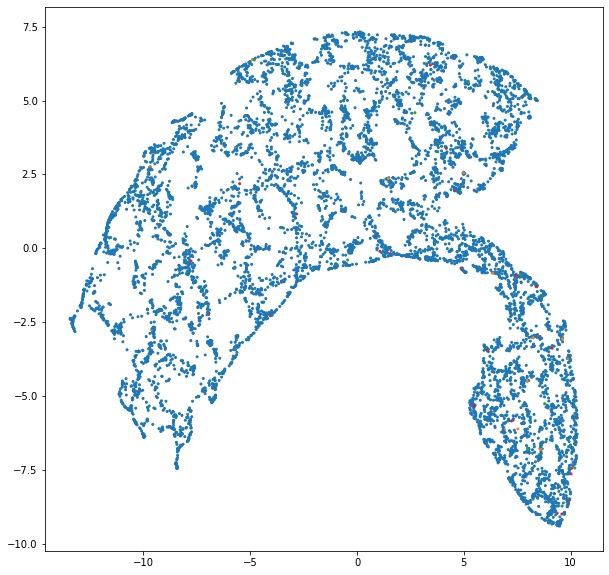

In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]
total_df["val_result"] = total_df["val_result"].astype('category')
plt.scatter(embedding[:, 0], embedding[:, 1],
    c=[sns.color_palette()[x] for x in total_df["val_result"].cat.codes], s=4)

In [5]:
total_df = total_df.replace("True ME", 1)
total_df = total_df.replace("False-positive", 2)
total_df = total_df.replace("Tissue-specific", 3)
val_df = total_df[total_df.val_result != "-1"]
total_df["val_result"].value_counts()

-1    7962
1       47
2       26
3       24
Name: val_result, dtype: int64

In [6]:
total_df["val_result"] = total_df["val_result"].astype('int')
total_df["val_result"]

151177    -1
25136     -1
159399    -1
160006    -1
91370     -1
          ..
4180871   -1
4041241   -1
4069873   -1
4041384   -1
4164901   -1
Name: val_result, Length: 8059, dtype: int64

In [7]:
total_reducer = umap.UMAP(n_neighbors=15)
total_reducer = total_reducer.fit(total_df.iloc[:, 8:], y=total_df["val_result"])
val_embeddings = total_reducer.transform(val_df.iloc[:, 8:])
total_embeddings = total_reducer.transform(total_df.iloc[:, 8:])

/Users/omar/Documents/GitHub/VMIAP/venv/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "venv/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Users/omar/Documents/GitHub/VMIAP/venv/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "venv/lib/python3.7/site-packages/umap/nndescent.py", line 124:
    @numba.njit(parallel=True)
    de

In [8]:
sns.scatterplot(val_embeddings[:, 0], val_embeddings[:, 1], hue=val_df["val_result"])

AttributeError: 'int' object has no attribute 'view'

In [ ]:
sns.scatterplot(total_embeddings[:, 0], total_embeddings[:, 1])

In [ ]:
plt.scatter(total_embeddings[:, 0], total_embeddings[:, 1],
    c=[sns.color_palette()[x] for x in total_df["val_result"].cat.codes], s=20)